In [42]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [43]:
# Loading the dataset
df = pd.read_csv('C:/USERS/YASHN/LOAN APPLICATION STATUS.CSV')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [44]:
# Checking the Dimensions
df.shape

(614, 13)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [46]:
# Checking the overview of the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
# Statistical Summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
# Checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
# Dropping unrequired column
df = df.drop("Loan_ID", axis=1)

Here, we can see that there are null values in our dataset.

In [51]:
# Checking the value counts of Gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

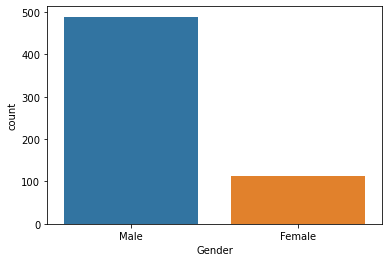

In [52]:
# Plotting the countplot
sns.countplot(df['Gender'])

In [53]:
# Filling the null values
df.Gender = df.Gender.fillna('Male')

In [55]:
# Checking the value counts of Married
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

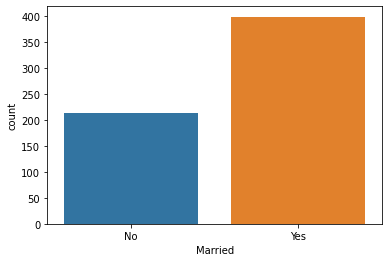

In [56]:
# Plotting countplot
sns.countplot(df['Married'])

In [57]:
# Filling the null values
df.Married = df.Married.fillna('Yes')

In [63]:
# Checking the value counts of Dependents
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

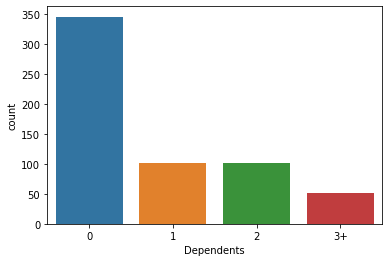

In [64]:
# Plotting countplot
sns.countplot(df['Dependents'])

In [65]:
# Filling the null values
df.Dependents = df.Dependents.fillna('0')

In [66]:
# Checking the value counts of Self Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:ylabel='count'>

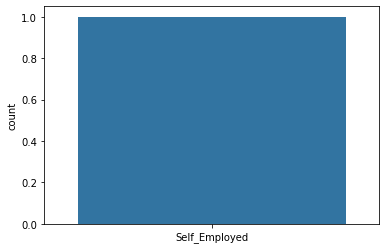

In [67]:
# Plotting the countplot
sns.countplot(['Self_Employed'])

In [68]:
# Filling the null values
df.Self_Employed = df.Self_Employed.fillna('No')

In [69]:
# Checking the value counts of Loan Amount
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

<AxesSubplot:ylabel='count'>

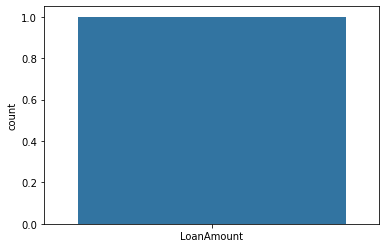

In [71]:
# Plotting the countplot
sns.countplot(['LoanAmount'])

In [72]:
# Filling the null values
df.LoanAmount = df.LoanAmount.fillna('120')

In [73]:
# Checking the value counts of Loan Amount Term
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:ylabel='count'>

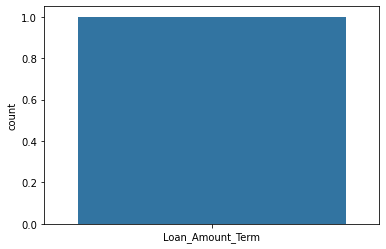

In [75]:
# Plotting the countplot
sns.countplot(['Loan_Amount_Term'])

In [76]:
# Filling the null values
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna('360')

In [77]:
# Checking the value counts of Credit History
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

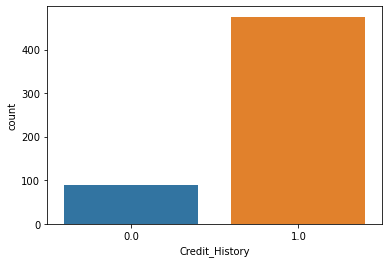

In [78]:
# Plotting the countplot
sns.countplot(df['Credit_History'])

In [79]:
# Filling the null values
df.Credit_History = df.Credit_History.fillna('1.0')

In [80]:
# Rechecking the null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We have successfully filled the null values in our dataset.

In [81]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<AxesSubplot:>

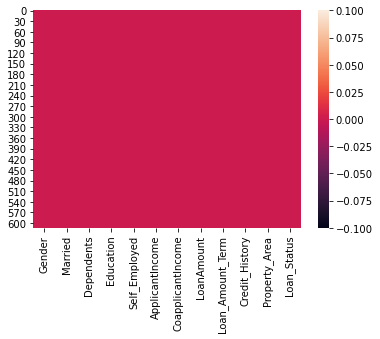

In [83]:
# Plotting heatmap
sns.heatmap(df.isnull())

In [84]:
# Checking the unique values
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [85]:
# Converting Non numeric data into numeric 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Gender"] = le.fit_transform(df['Gender'])
df["Married"] = le.fit_transform(df['Married'])
df["Education"] = le.fit_transform(df['Education'])
df["Self_Employed"] = le.fit_transform(df['Self_Employed'])
df["Property_Area"] = le.fit_transform(df['Property_Area'])
df["Loan_Status"] = le.fit_transform(df['Loan_Status'])
df["Dependents"] = le.fit_transform(df['Dependents'])


In [86]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


We have successfully converted non numerical data to numeric data.

In [87]:
# Checking Correlation
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.010522,-0.059187
Property_Area,-0.025752,0.004257,-0.000244,-0.065243,-0.030860,-0.009500,0.010522,1.000000,0.032112
Loan_Status,0.017987,0.091478,0.010118,-0.085884,-0.003700,-0.004710,-0.059187,0.032112,1.000000


<AxesSubplot:>

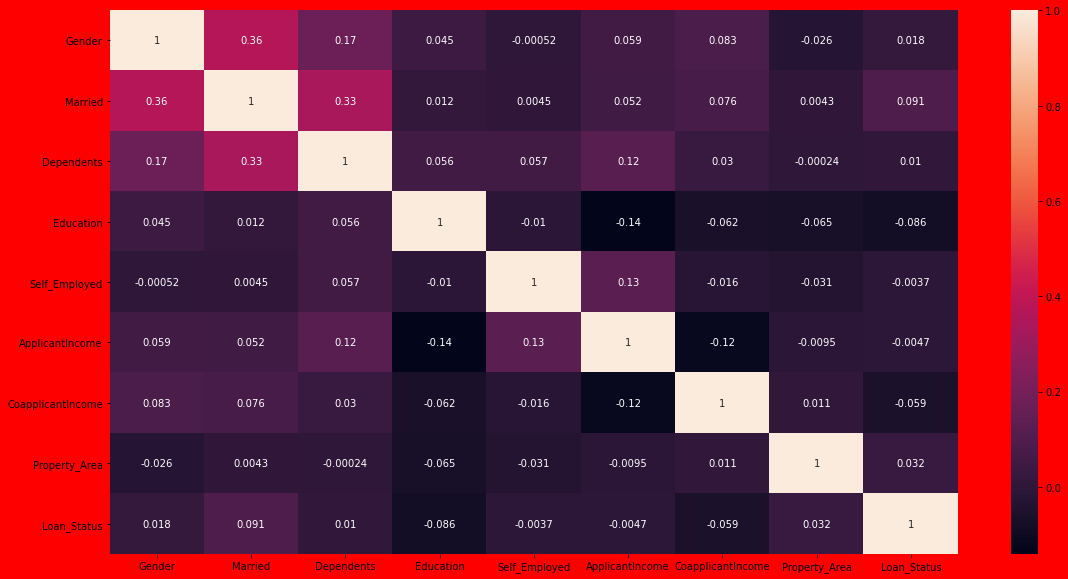

In [89]:
# Plotting Heatmap
plt.figure(figsize=[19,10],facecolor='red')
sns.heatmap(df.corr(),annot=True)

In [90]:
# Checking the skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Density'>

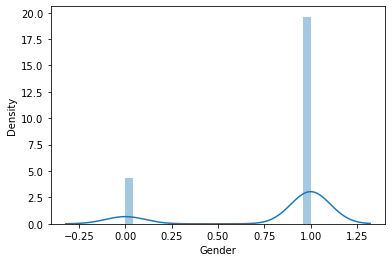

In [91]:
sns.distplot(df['Gender'])

<AxesSubplot:xlabel='Married', ylabel='Density'>

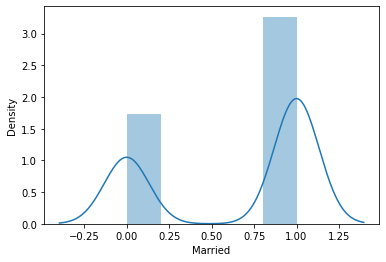

In [92]:
sns.distplot(df['Married'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

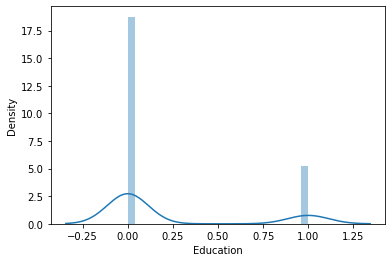

In [94]:
sns.distplot(df['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

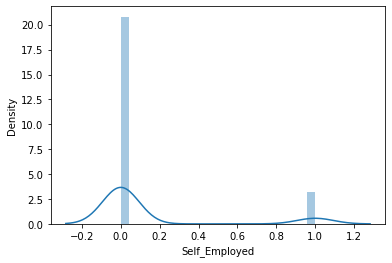

In [96]:
sns.distplot(df['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

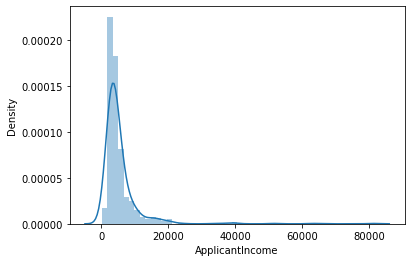

In [97]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

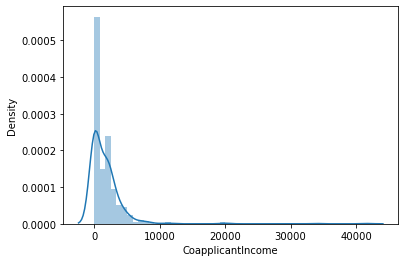

In [98]:
sns.distplot(df['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

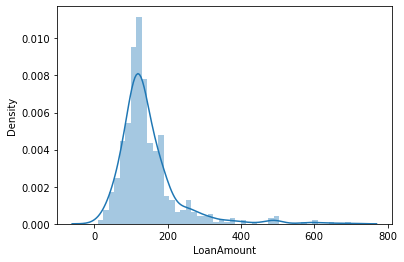

In [100]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

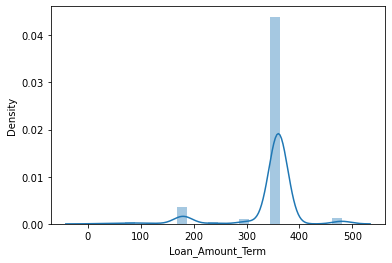

In [101]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

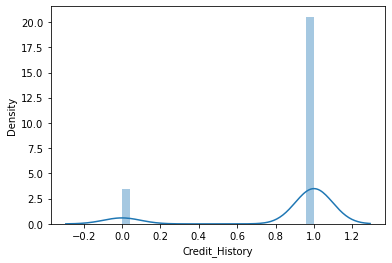

In [103]:
sns.distplot(df['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

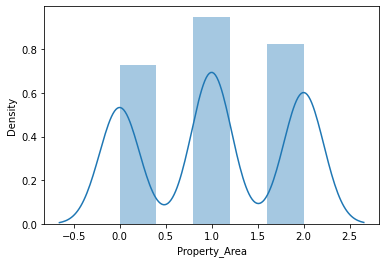

In [104]:
sns.distplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

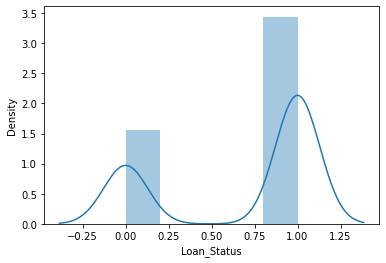

In [105]:
sns.distplot(df['Loan_Status'])

From the above graphs, we can see that most of them are bimodal and some are also having skewness, which we need to remove.

<AxesSubplot:>

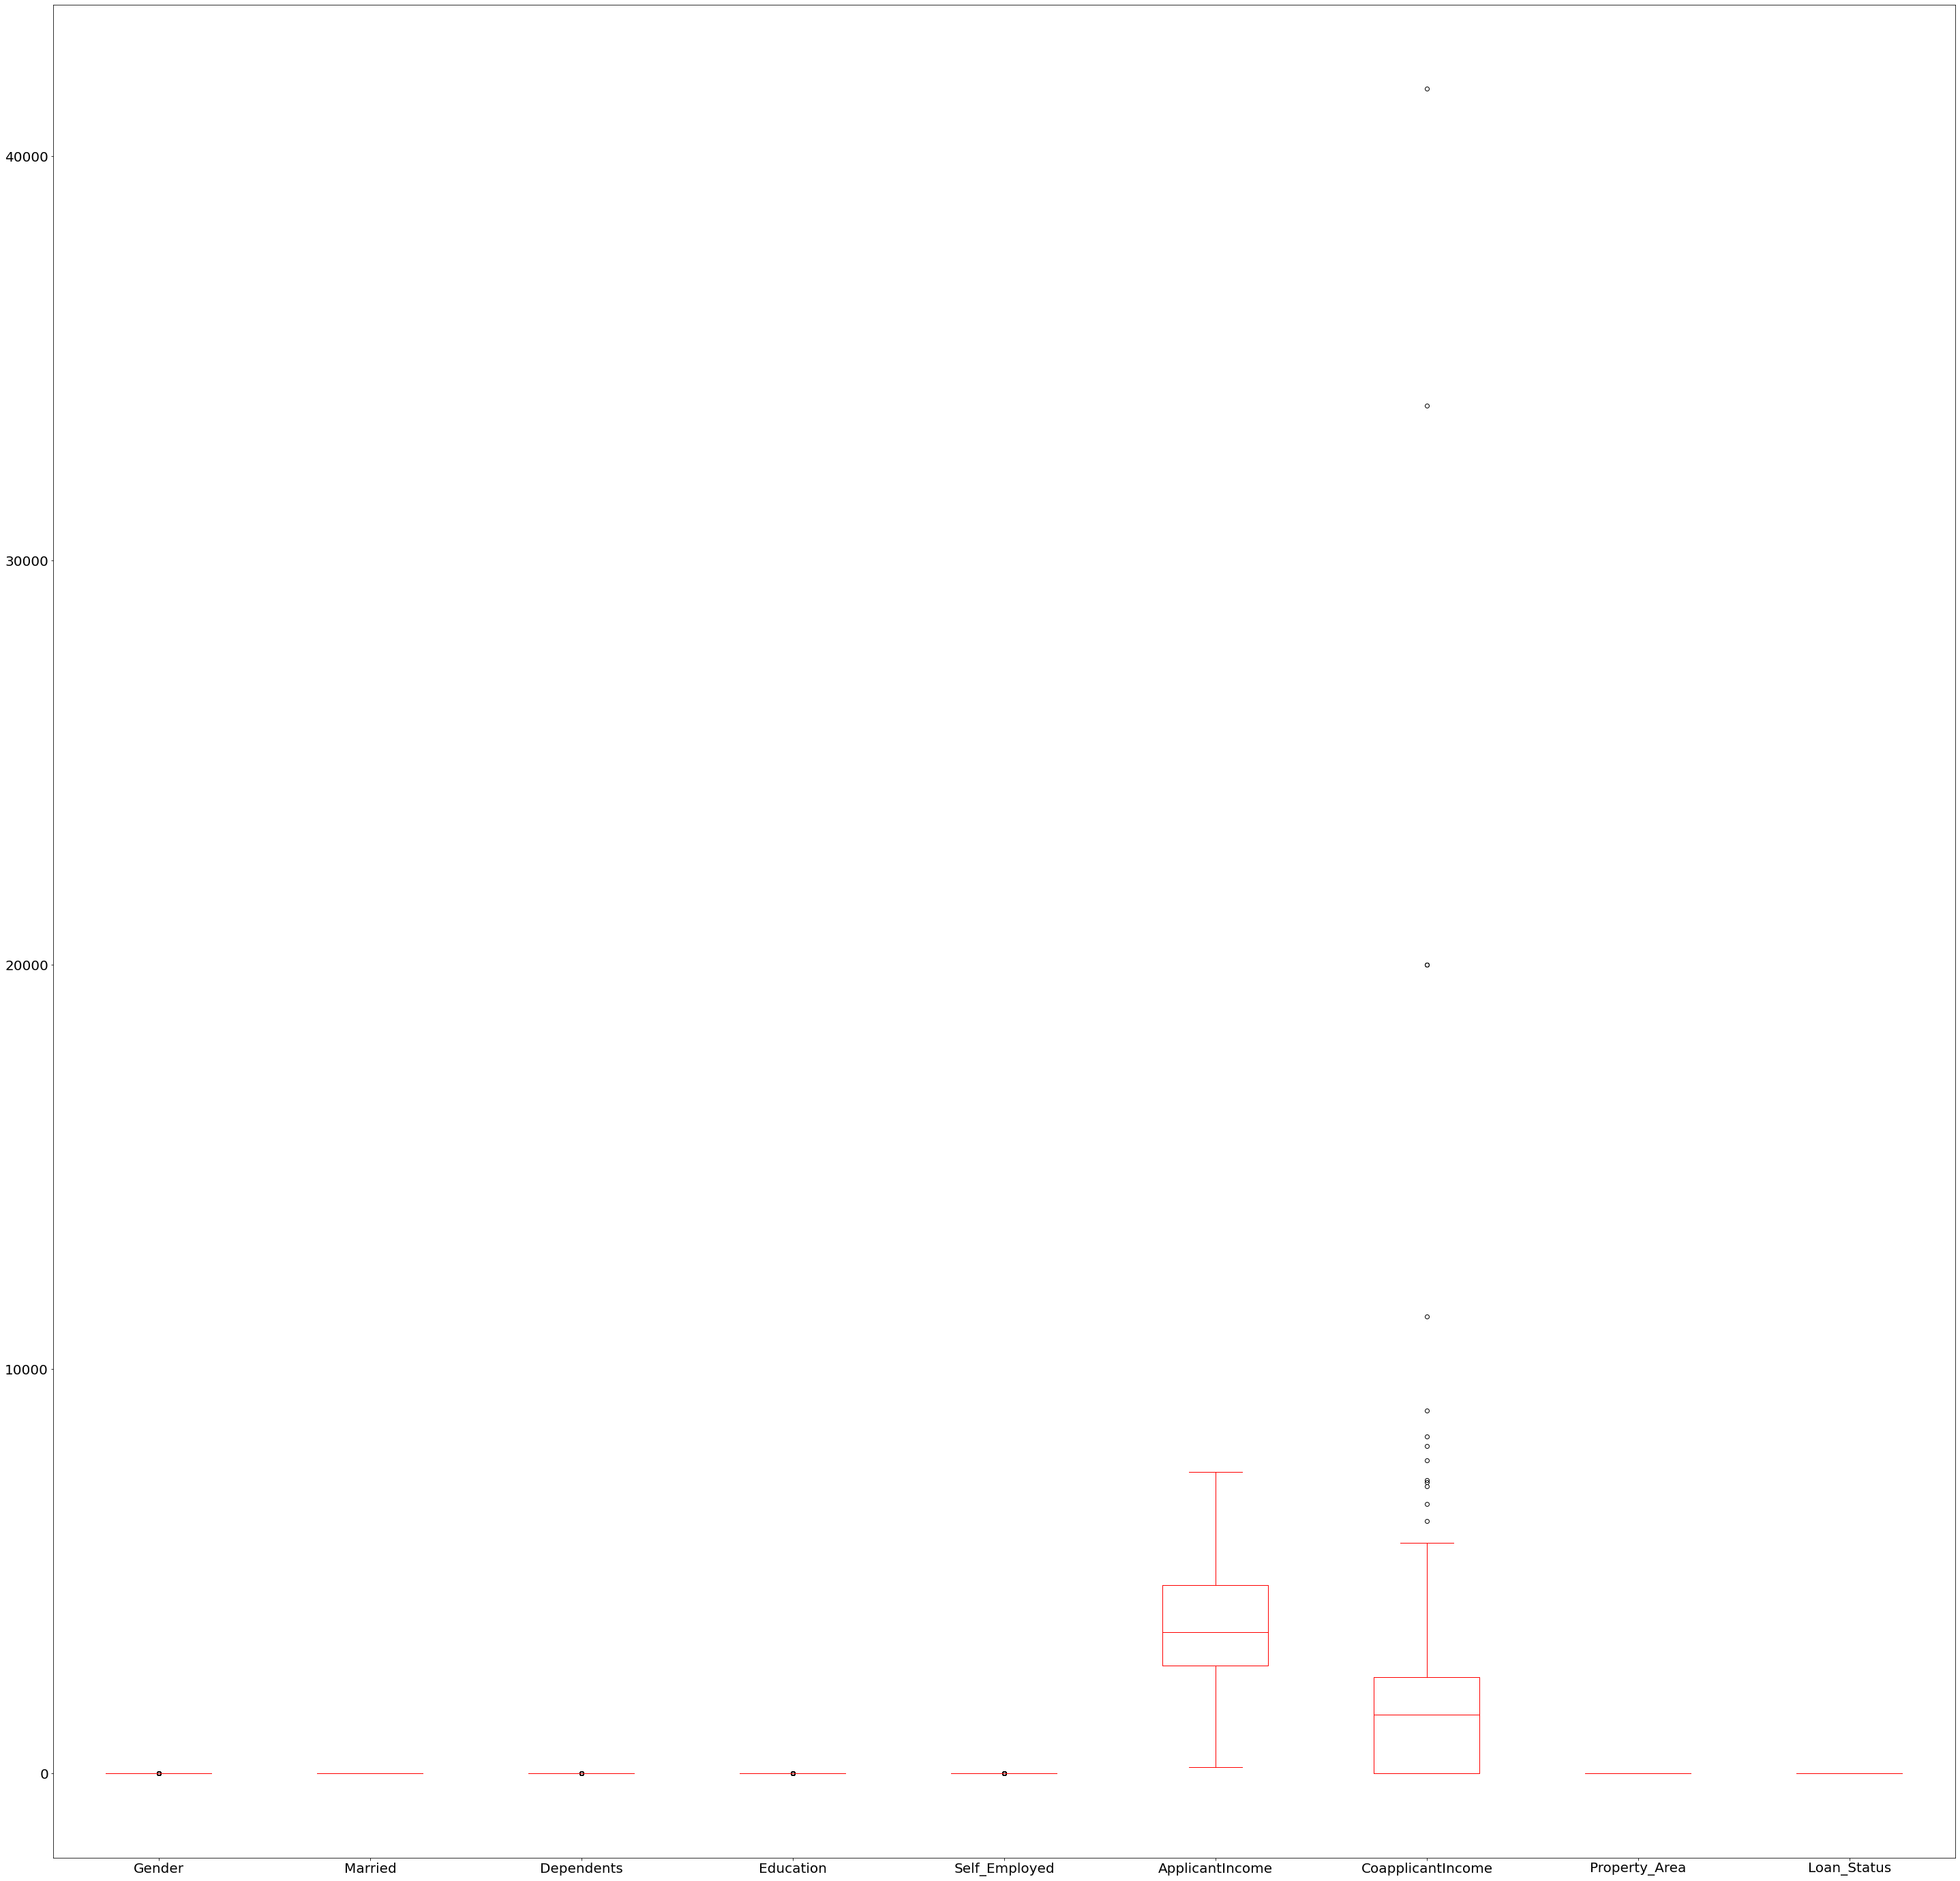

In [110]:
#Checking for skewness and outliers.
df.plot(kind = 'box',figsize =(50,50),fontsize =20 ,color ='r')

There are outliers in most of the columns, but we can see maximum outliers in Applicant Income and Coapplicant income. So will remove those outliers.

<AxesSubplot:title={'center':'Box-plot of ApplicantIncome'}, xlabel='ApplicantIncome'>

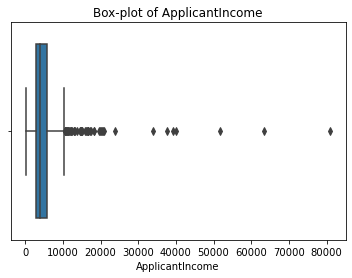

In [106]:
# checking outliers in applicant income
plt.title('Box-plot of ApplicantIncome')
sns.boxplot('ApplicantIncome',data=df)

In [111]:
# Removing Outliers
df=df[df['ApplicantIncome']<7500]

<AxesSubplot:title={'center':'Box-plot of ApplicantIncome'}, xlabel='ApplicantIncome'>

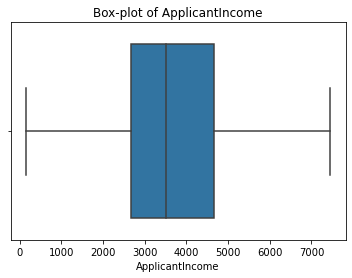

In [113]:
# After Removing outliers
plt.title('Box-plot of ApplicantIncome')
sns.boxplot('ApplicantIncome',data=df)

<AxesSubplot:title={'center':'Box-plot ofCoapplicantIncome '}, xlabel='CoapplicantIncome'>

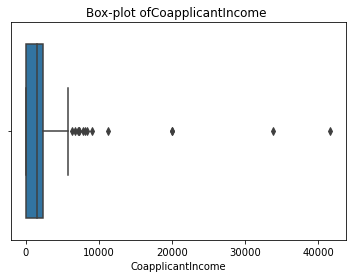

In [109]:
# checking outliers in  co-applicant income
plt.title('Box-plot ofCoapplicantIncome ')
sns.boxplot('CoapplicantIncome',data=df)

In [245]:
# Removing Outliers
df=df[df['CoapplicantIncome']<6000]

<AxesSubplot:title={'center':'Box-plot of CoapplicantIncome'}, xlabel='CoapplicantIncome'>

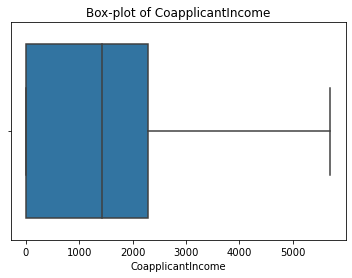

In [130]:
# After Removing outliers
plt.title('Box-plot of CoapplicantIncome')
sns.boxplot('CoapplicantIncome',data=df)

From the above boxplots, we can see there are outiers in out data.

We have removed the outliers. will recheck the skewness

In [248]:
# Rechecking skewness
df.skew()

Gender              -1.590530
Married             -0.598698
Dependents           1.082628
Education            1.130958
Self_Employed        2.525386
ApplicantIncome      0.491586
CoapplicantIncome    0.776220
LoanAmount           0.970885
Loan_Amount_Term    -2.480232
Credit_History      -1.989223
Property_Area       -0.038059
Loan_Status         -0.825774
dtype: float64

In [250]:
# Removing skewness 
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[['CoapplicantIncome','LoanAmount']] = scaler.fit_transform(df[['CoapplicantIncome','LoanAmount']].values)

We have no skewness

In [251]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,-1.205172,-0.012356,360.0,1.0,2,1
1,1,1,1,0,0,4583,0.667452,0.161102,360.0,1.0,0,0
2,1,1,0,0,1,3000,-1.205172,-1.360712,360.0,1.0,2,1
3,1,1,0,1,0,2583,0.851378,-0.012356,360.0,1.0,2,1
4,1,0,0,0,0,6000,-1.205172,0.432699,360.0,1.0,2,1


In [252]:
# Splitting the dataset
y = df['Loan_Status']
x = df.drop(columns=['Loan_Status'], axis=1)

In [253]:
# Scaling the data
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.483298,-1.342053,-0.709634,-0.584183,-0.348829,1.501158,-1.205172,-0.012356,0.253634,0.416667,1.249580
1,0.483298,0.745127,0.306706,-0.584183,-0.348829,0.595667,0.667452,0.161102,0.253634,0.416667,-1.305005
2,0.483298,0.745127,-0.709634,-0.584183,2.866737,-0.536554,-1.205172,-1.360712,0.253634,0.416667,1.249580
3,0.483298,0.745127,-0.709634,1.711792,-0.348829,-0.834808,0.851378,-0.012356,0.253634,0.416667,1.249580
4,0.483298,-1.342053,-0.709634,-0.584183,-0.348829,1.609158,-1.205172,0.432699,0.253634,0.416667,1.249580
...,...,...,...,...,...,...,...,...,...,...,...
502,0.483298,0.745127,1.323047,1.711792,-0.348829,0.169386,0.641019,0.751653,0.253634,0.416667,-1.305005
503,0.483298,0.745127,-0.709634,-0.584183,-0.348829,-0.370618,0.771873,-0.282815,0.253634,0.416667,-1.305005
504,-2.069118,-1.342053,-0.709634,-0.584183,-0.348829,-0.608077,-1.205172,-1.218520,0.253634,0.416667,-1.305005
505,0.483298,0.745127,2.339387,-0.584183,-0.348829,0.254499,-1.205172,-2.196983,-2.501922,0.416667,-1.305005


In [255]:
maxAccu = 0
maxRS = 0
for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=i)
    rf= RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best accuracy is ", maxAccu, " on Random_state", maxRS)
    

Best accuracy is  0.8688524590163934  on Random_state 41


In [256]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=maxRS)

In [257]:
x_train.shape

(385, 11)

In [258]:
x_test.shape

(122, 11)

In [259]:
y_train.shape

(385,)

In [260]:
y_test.shape

(122,)

In [262]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
lr_predict=lr.predict(x_test)

0.3095766540436482


In [266]:
print('MSE:',mean_squared_error(lr_predict,y_test))
print('MAE:',mean_absolute_error(lr_predict,y_test))
print('r2_score:',r2_score(lr_predict,y_test))


MSE: 0.1116021792895483
MAE: 0.2690886748189762
r2_score: -0.8257534135221294


In [268]:
# USING SGD REGRESSOR
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
sgd=SGDRegressor()
sgd.fit(x_train,y_train)
pred=sgd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.3774062087646276
MSE: 0.11009586526011152
MAE: 0.2684500874598308
RMSE: 0.33180696987874064


In [270]:
# USING LASSO
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
Z=GridSearchCV(ls,parameters)
Z.fit(x_train,y_train)
print(Z.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [272]:

ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: -0.06300945176483053
MSE: 0.18797640936878748
MAE: 0.41077283372365325
RMSE: 0.4335624630532347


In [273]:
# USING RIDGE
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'saga'}


In [274]:
rd=Ridge(alpha=10,solver='lsqr')
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

R2_score: 0.36927114809358763
MSE: 0.11153442207858619
MAE: 0.27121989325009216
RMSE: 0.3339676961602517


In [275]:
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

# feeding the training set into the model
lr.fit(x_train, y_train)

# predicting the results for the test set
y_pred = lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", lr.score(x_train, y_train))
print("Testing accuracy :", lr.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7922077922077922
Testing accuracy : 0.8934426229508197
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        28
           1       0.88      1.00      0.94        94

    accuracy                           0.89       122
   macro avg       0.94      0.77      0.82       122
weighted avg       0.91      0.89      0.88       122

[[15 13]
 [ 0 94]]


In [276]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(rf.score(x_test, y_test)*100, 2)))

Test Accuracy: 86.07%


In [300]:
# USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7295081967213115


In [278]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.64      0.51        28
           1       0.87      0.73      0.80        94

    accuracy                           0.71       122
   macro avg       0.65      0.69      0.65       122
weighted avg       0.77      0.71      0.73       122

[[18 10]
 [25 69]]


In [279]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8524590163934426


In [280]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.57      0.64        28
           1       0.88      0.94      0.91        94

    accuracy                           0.85       122
   macro avg       0.80      0.75      0.77       122
weighted avg       0.84      0.85      0.85       122

[[16 12]
 [ 6 88]]


In [290]:
# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(10)
def rmse_cv(model,x,y):
    rmse =-(cross_val_score(model,x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)

models = [LinearRegression(),
         Ridge(),
         SVR(kernel='linear'),
         SVR(kernel='poly'),
         SVR(kernel='rbf'),
         RandomForestRegressor(),
         DecisionTreeRegressor(),
         GradientBoostingRegressor(),]

names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}   : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR   : 0.150674, 0.020700
R   : 0.150648, 0.020678
svr   : 0.155092, 0.024791
svr_p   : 0.247524, 0.036833
svr_r   : 0.171580, 0.033192
RF   : 0.154546, 0.030674
DTR   : 0.282275, 0.054699
GBR   : 0.166222, 0.029623


In [284]:
# Hypertuning
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [285]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [286]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=100, verbose=2)

In [287]:
rf_randomized.best_params_

{'n_estimators': 644,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [288]:
rf_final=rf_randomized.best_estimator_

In [289]:
y_pred_random=rf_final.predict(x_test)

Hence, we can see that Random Forest gives us the best accuracy score of 85 %

In [299]:
# AUC ROC
auc = roc_auc_score(y_test, y_pred)
auc

0.7678571428571428

In [292]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [293]:
fpr

array([0.        , 0.46428571, 1.        ])

In [294]:
tpr

array([0., 1., 1.])

In [295]:
thresholds

array([2, 1, 0])

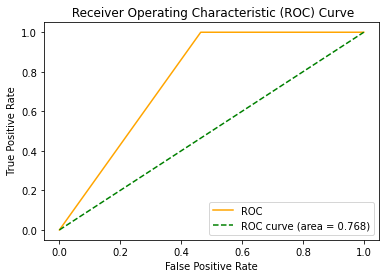

In [296]:
# Plotting AUC ROC Curve
plt.plot(fpr, tpr, color='orange',label='ROC')
plt.plot([0, 1],[0, 1], color='green', linestyle='--', label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [297]:
# Saving The model
import pickle
file = 'LOAN STATUS PREDICTION CASE STUDY.pkl'
#save file
save = pickle.dump(RandomForestRegressor,open(file,'wb'))

In [298]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
117,1,1
118,1,1
119,1,1
120,1,1


We can say that , the prediction is showing a similar relationship with the actual loan status from the train data set, which means the model is predicted correctly.